In [1]:
from collections import defaultdict
import numpy as np

minmax_x = [9999999999999, -9999999999999]
minmax_y = [9999999999999, -9999999999999]

min_xy = 1154.3633707622228 - 10, 4548.483054302677 - 10

pos_dic = defaultdict(lambda: [])
with open("data/merfish/mouse/spot_table.csv") as f:
    print(f.readline())
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[1]) - min_xy[0]
        y = float(entries[2]) - min_xy[1]
        g = entries[3]
        if "Blank-" in g:
            continue
        pos_dic[g].append([x, y])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
for g in pos_dic:
    pos_dic[g] = np.array(pos_dic[g])

,x_um,y_um,gene



In [2]:
all_genes = sorted(pos_dic.keys())
mrna_loci = [pos_dic[gene] for gene in all_genes]

In [3]:
width, height = 2124, 2337

In [4]:
import ssam

In [5]:
ds = ssam.SSAMDataset(all_genes, mrna_loci, width, height)
analysis = ssam.SSAMAnalysis(ds, ncores=10, save_dir="data/merfish_mouse", verbose=True)

In [6]:
analysis.run_fast_kde(bandwidth=2.5, use_mmap=False)

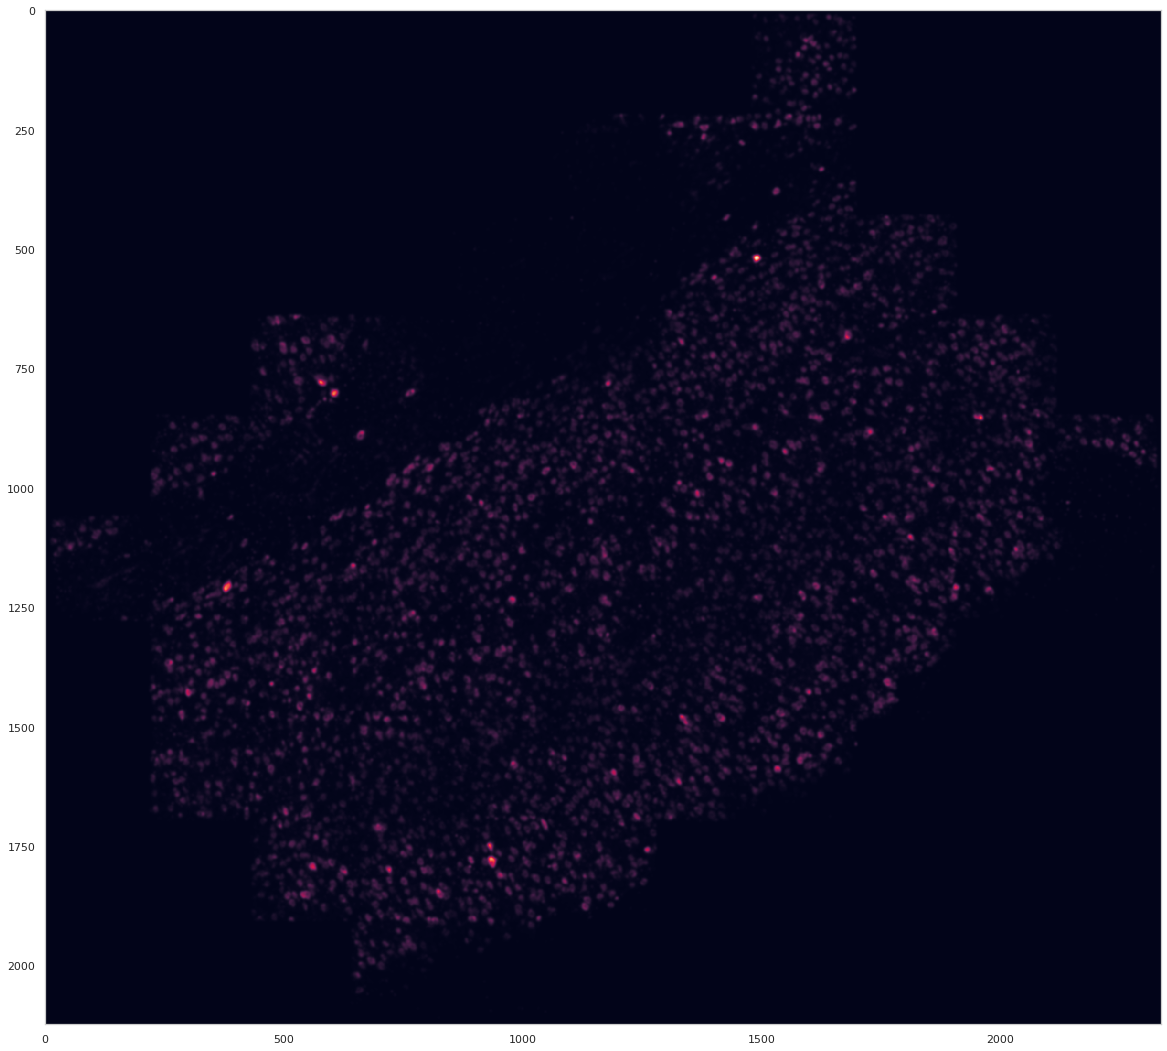

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 20])
plt.imshow(ds.vf_norm[..., 0])

In [28]:
import pickle
with open("scrna_sigs.pkl", "rb") as f:
    scrna_clusters, scrna_genes, scrna_full_centroids, scrna_colors = pickle.load(f)

In [26]:
gene_conv_dic ={
    "Ngfrap1": "Bex3",
    "Gucy1a3": "Gucy1a1",
    "Ppap2b": "Plpp3",
    "Selm": "Selenom",
    "3110035E14Rik": "Vxn",
    "Ppapdc1a": "Plpp4",
    #"Fam84b": "Lratd2"
}

In [29]:
for f, t in gene_conv_dic.items():
    scrna_genes = np.where(scrna_genes == f, t, scrna_genes)

In [30]:
selected_genes_idx = [list(scrna_genes).index(g) for g in ds.genes]
scrna_uniq_clusters = np.unique(scrna_clusters)
scrna_centroids = scrna_full_centroids[:, selected_genes_idx]

In [31]:
analysis.map_celltypes(scrna_centroids)
analysis.filter_celltypemaps(min_norm=0.6, min_r=0.3)

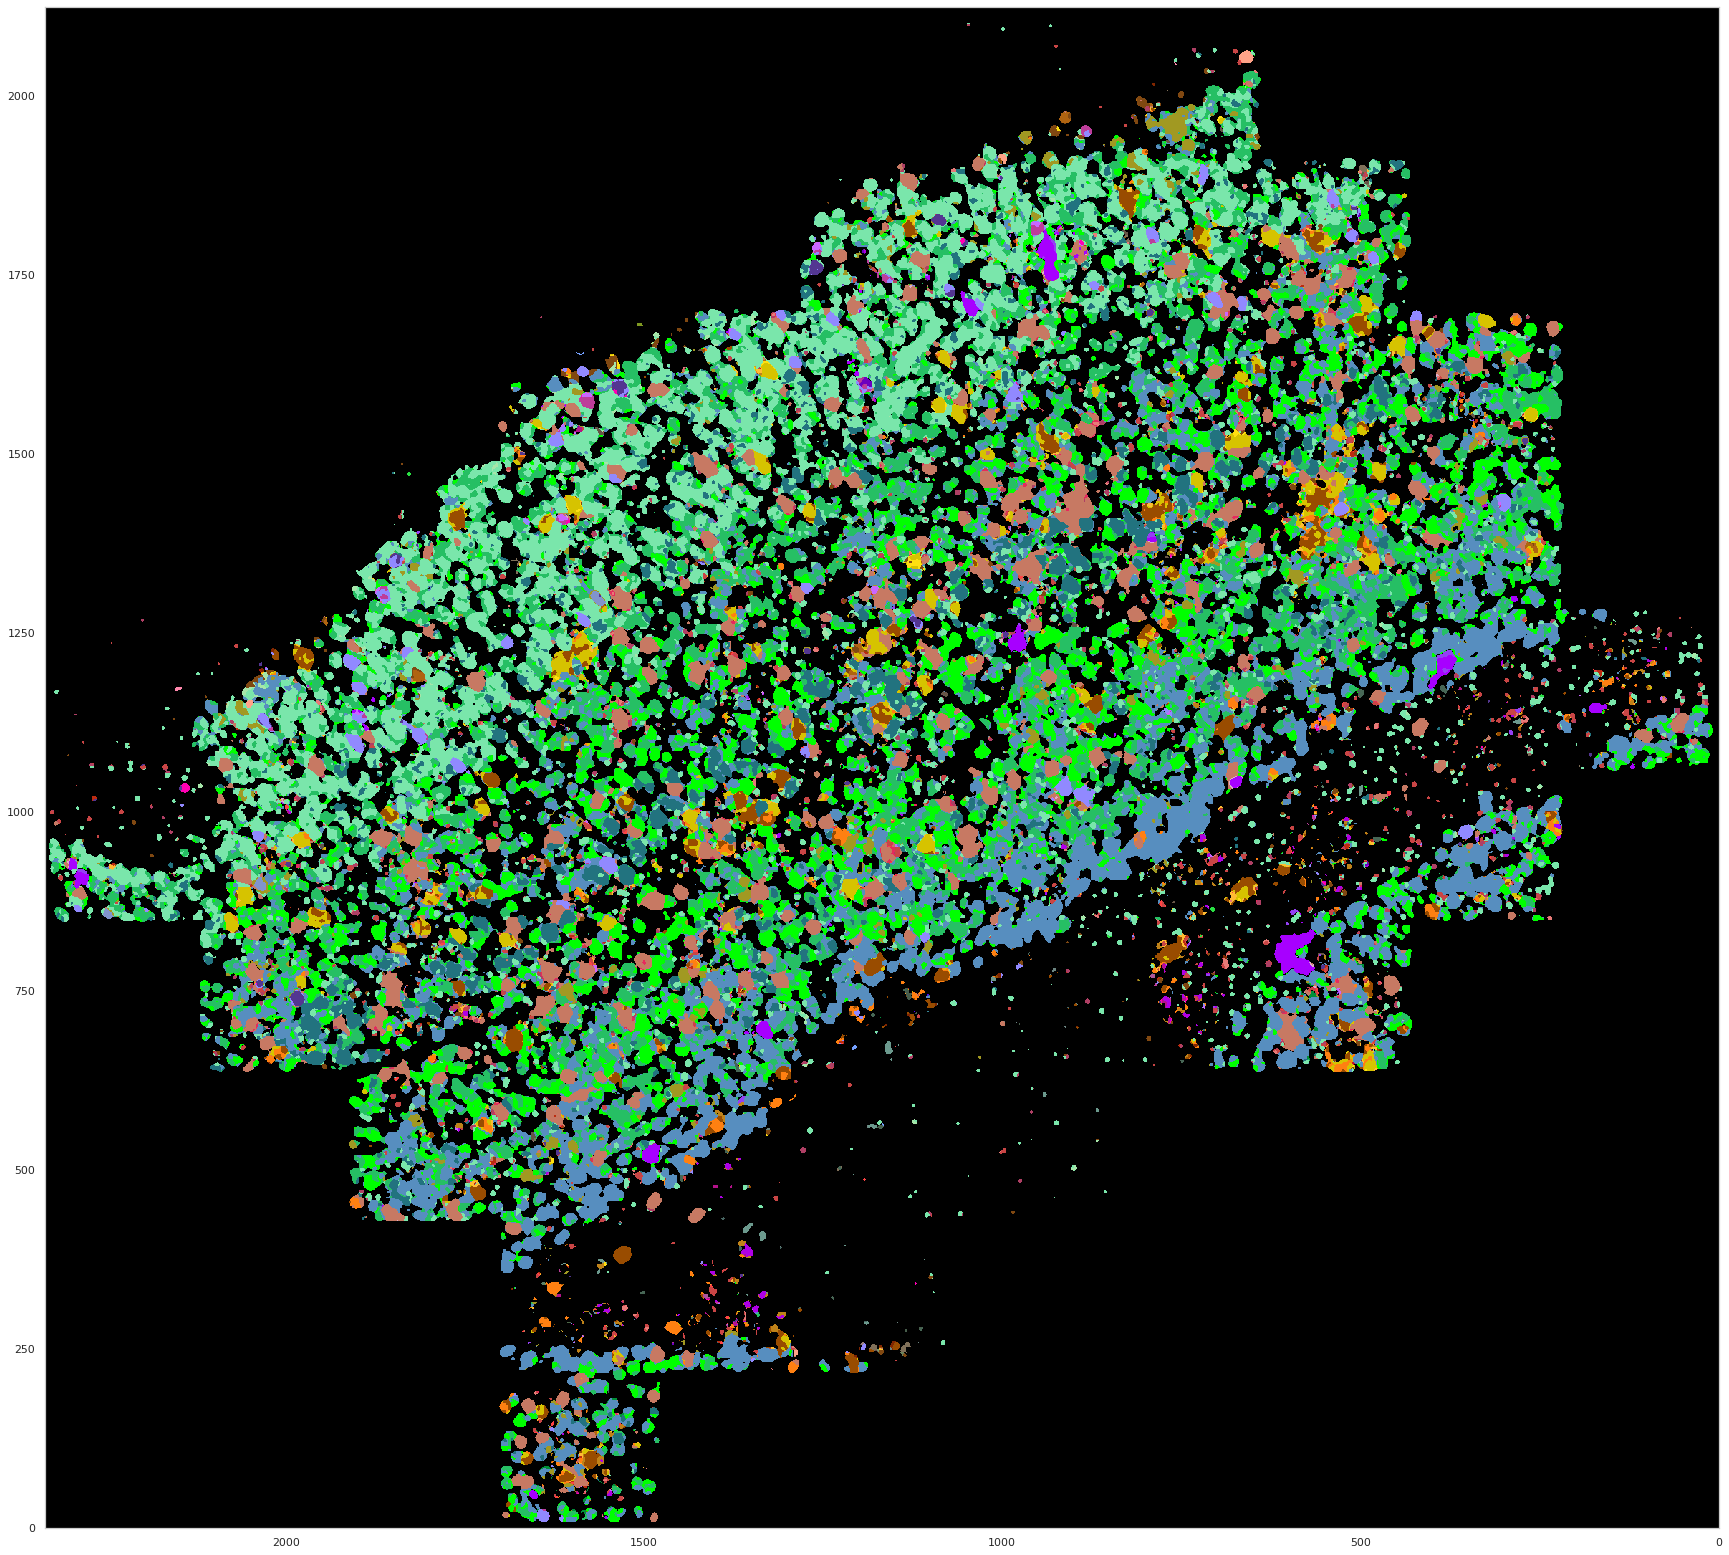

In [33]:
plt.figure(figsize=[30,30])
_ = ds.plot_celltypes_map(rotate=2, colors=scrna_colors)

In [8]:
exp_thres = 0
norm_thres = 0

In [9]:
analysis.find_localmax(search_size=3, min_expression=exp_thres, min_norm=norm_thres)

Found 10009 local max vectors.


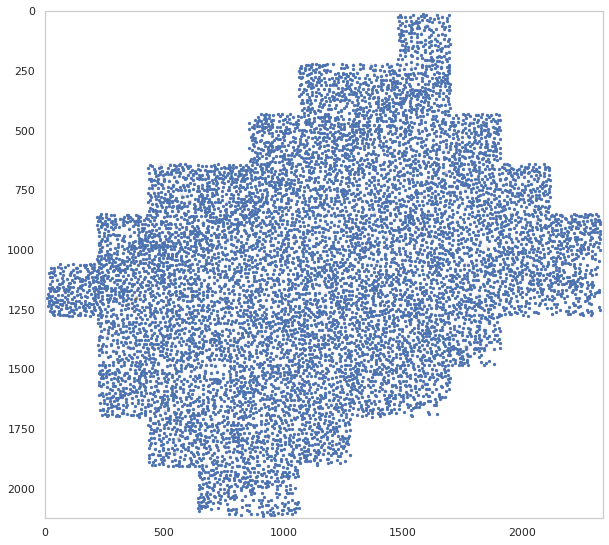

In [10]:
plt.figure(figsize=[10, 20])
ds.plot_l1norm(cmap="Greys")
ds.plot_localmax(s=5)

In [40]:
analysis.normalize_vectors_sctransform()

In [41]:
analysis.map_celltypes(scrna_centroids)
analysis.filter_celltypemaps(min_norm=0.6, min_r=0.3)

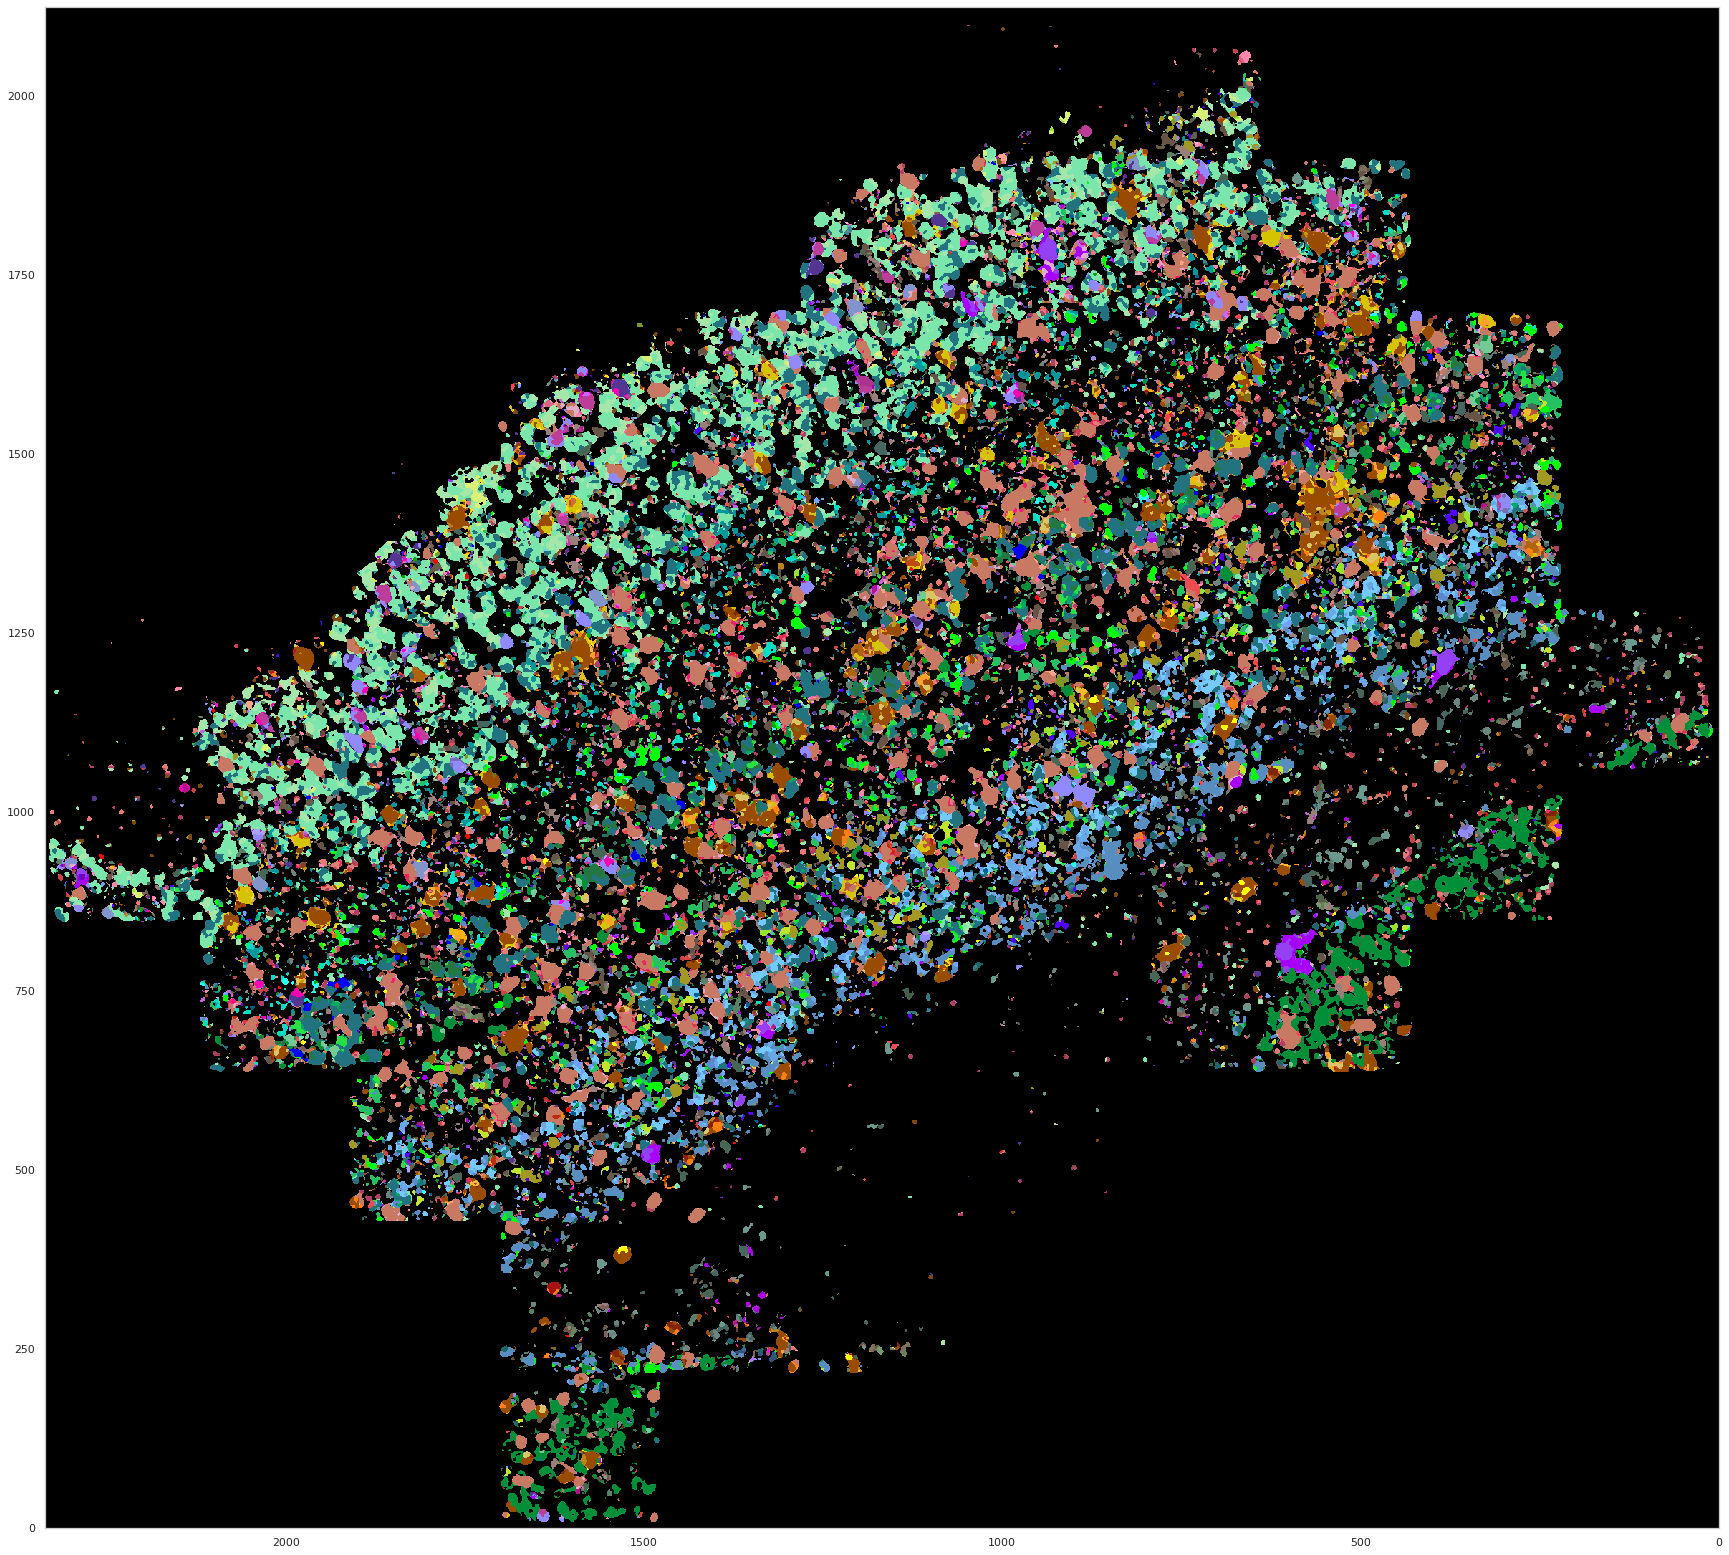

In [42]:
plt.figure(figsize=[30,30])
_ = ds.plot_celltypes_map(rotate=2, colors=scrna_colors)

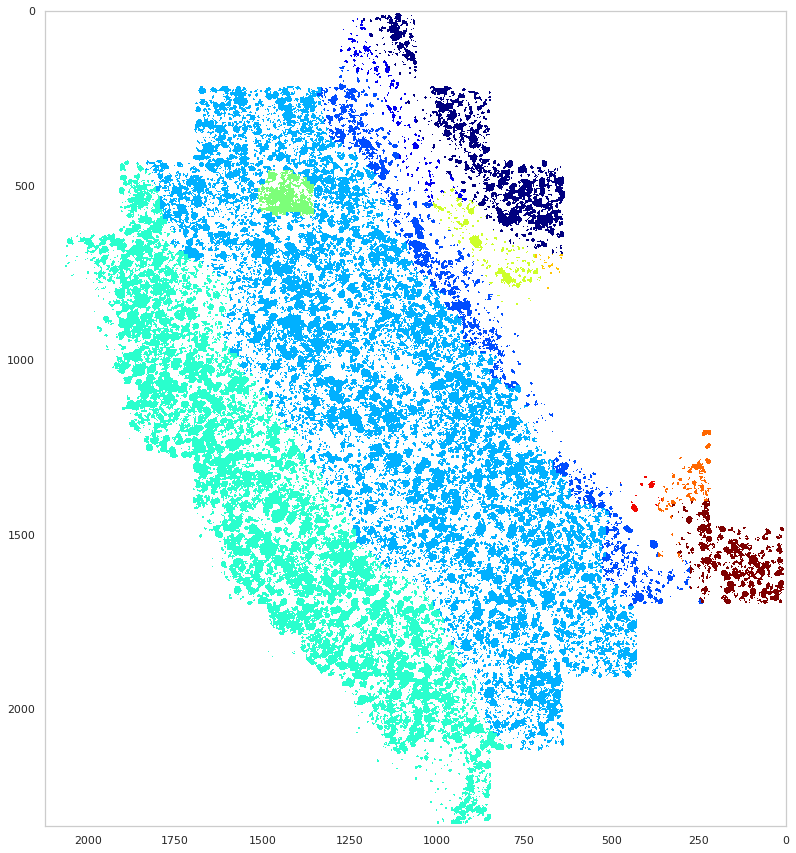

In [43]:
analysis.bin_celltypemaps(step=10, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.8, norm_thres=1500)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=1)

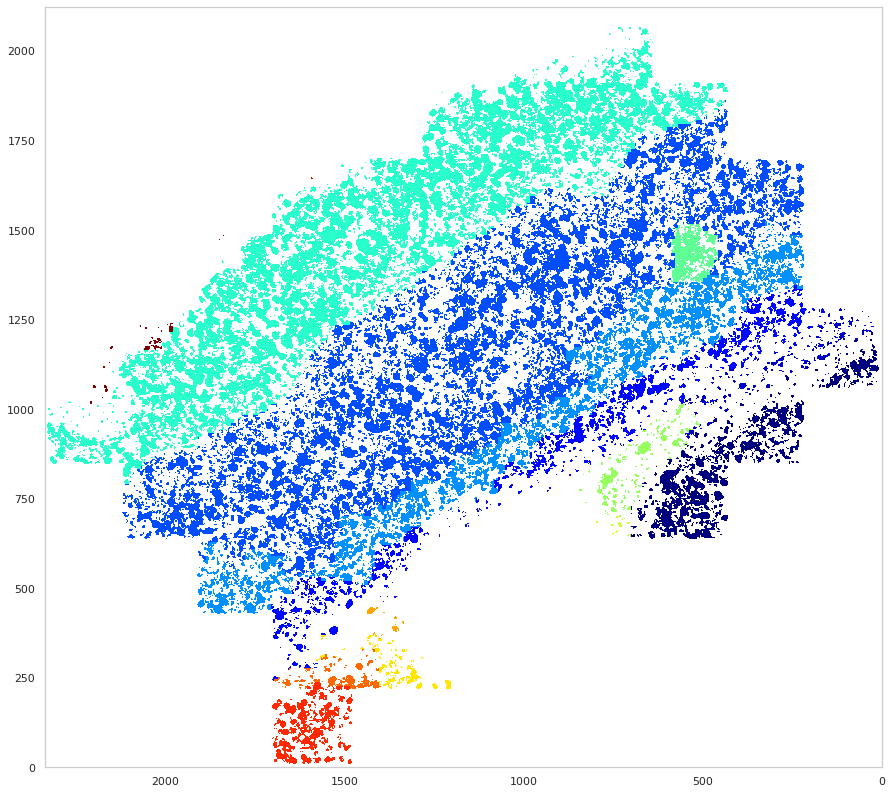

In [44]:
analysis.bin_celltypemaps(step=10, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.8, norm_thres=1500)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=2)

In [12]:
analysis.cluster_vectors(pca_dims=33, resolution=0.6, max_correlation=1.0, metric="correlation", centroid_correction_threshold=0.6)

Found 37 clusters


In [13]:
analysis.map_celltypes()

In [14]:
analysis.filter_celltypemaps(min_norm=0.5, min_r=0.6)

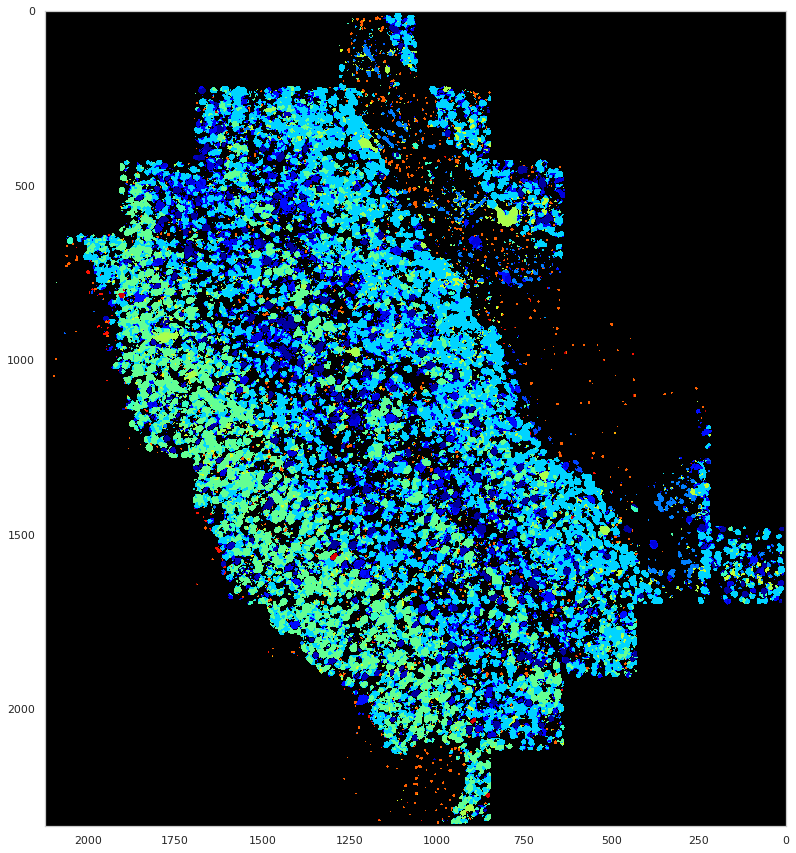

In [15]:
plt.figure(figsize=[15,15])
_=ds.plot_celltypes_map(rotate=True,)#colors=colors,background='white')#,set_alpha=True)

In [16]:
exp_thres = 0
norm_thres = 0

In [17]:
analysis.find_localmax(search_size=3, min_expression=exp_thres, min_norm=norm_thres)

Found 10009 local max vectors.


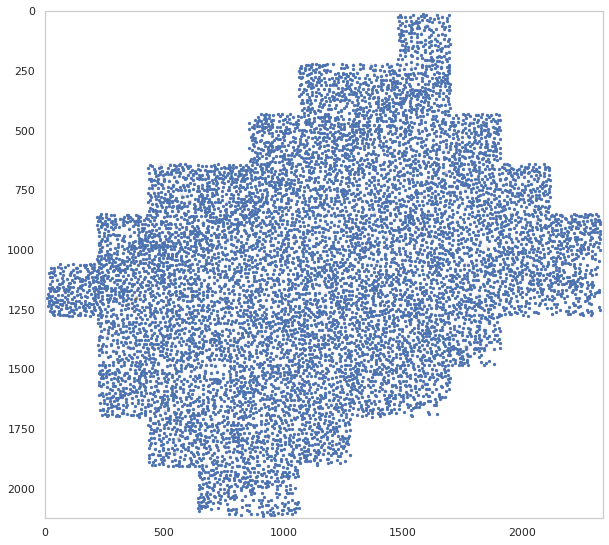

In [18]:
plt.figure(figsize=[10, 20])
ds.plot_l1norm(cmap="Greys")
ds.plot_localmax(s=5)